In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

1. Instrucciones:
Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00



2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [5]:
menor= df["density"].min()
print(menor)
mayor= df["density"].max()
print(mayor)

1.265
847.0


In [6]:
paises_menor = df[df["density"] == menor]["country"]

In [7]:
paises_mayor = df[df["density"] == mayor]["country"]

In [8]:
print("País con menor densidad:")
print(paises_menor.to_list())

print("País con mayor densidad:")
print(paises_mayor.to_list())

País con menor densidad:
['Bangladesh']
País con mayor densidad:
['Palestinian National Authority']


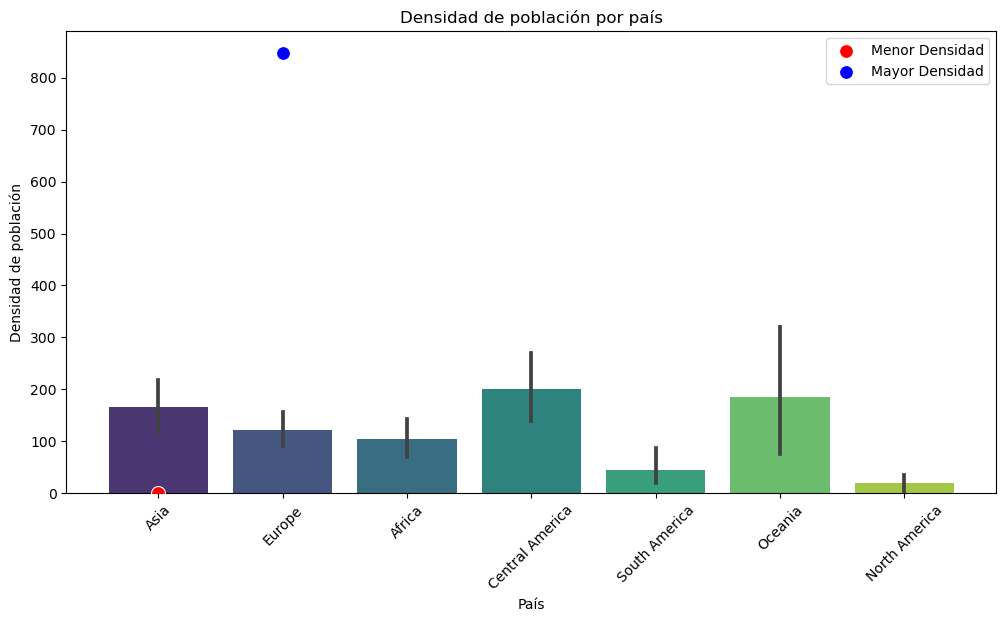

In [9]:

# Filtrar los países con densidad mínima y máxima
paises_menor = df[df["density"] == menor]
paises_mayor = df[df["density"] == mayor]

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))

# Crear la gráfica general
sns.barplot(x=df["continent"], y=df["density"], palette="viridis")

# Resaltar países con densidad mínima (en rojo)
sns.scatterplot(x=paises_menor["country"], y=paises_menor["density"], color="red", s=100, label="Menor Densidad", zorder=5)

# Resaltar países con densidad máxima (en azul)
sns.scatterplot(x=paises_mayor["country"], y=paises_mayor["density"], color="blue", s=100, label="Mayor Densidad", zorder=5)

# Agregar títulos y etiquetas
plt.xlabel("País")
plt.ylabel("Densidad de población")
plt.title("Densidad de población por país")

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)

# Mostrar leyenda
plt.legend()

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.



In [10]:
df[["country", "birth_rate"]]

,country,birth_rate
0,Afghanistan,32.49
1,Albania,11.78
2,Algeria,24.28
3,Andorra,7.20
4,Angola,40.73
...,...,...
190,Venezuela,17.88
191,Vietnam,16.75
192,Yemen,30.45
193,Zambia,36.19


In [11]:
media= round(df["birth_rate"].mean(), 2)

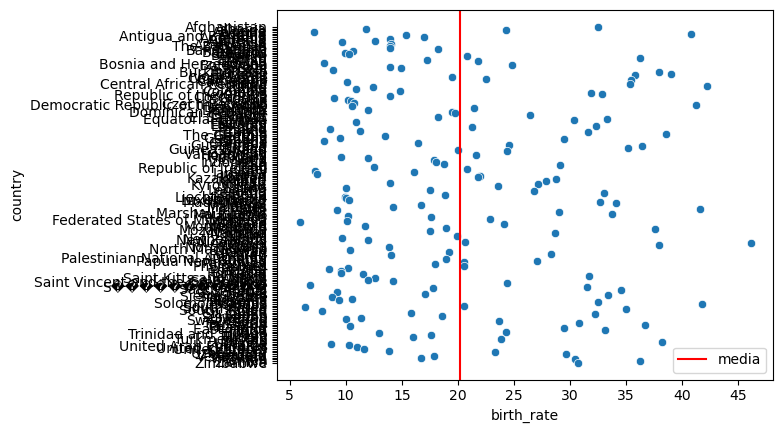

In [12]:
sns.scatterplot(x="birth_rate", y="country", data=df, )
plt.axvline(media, color="red", label= "media")
plt.legend();

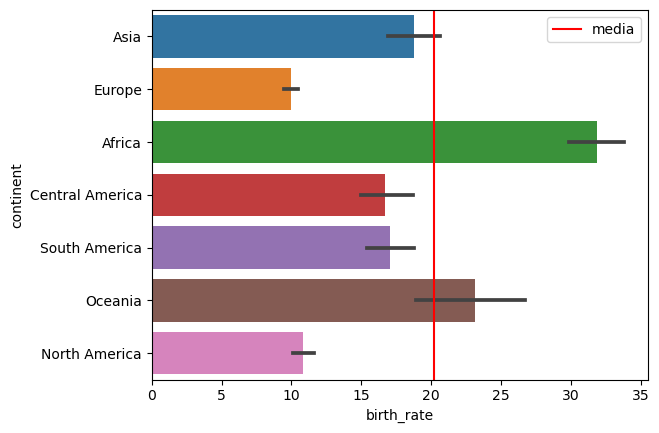

In [13]:
sns.barplot(x="birth_rate", y="continent", data=df, )
plt.axvline(media, color="red", label= "media")
plt.legend();


4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [14]:
df[["country", "infant_mortality"]]

,country,infant_mortality
0,Afghanistan,47.9
1,Albania,7.8
2,Algeria,20.1
3,Andorra,2.7
4,Angola,51.6
...,...,...
190,Venezuela,21.4
191,Vietnam,16.5
192,Yemen,42.9
193,Zambia,40.4


In [15]:
media_mort = round(df["infant_mortality"].mean(), 2)
media_mort

21.33

In [16]:
Q1 = np.nanpercentile(df["infant_mortality"], 25)
print(Q1)
Q3 = np.nanpercentile(df["infant_mortality"], 75)
print(Q3)

6.0
32.7


In [17]:
df_mort_infantil = df[["country", "infant_mortality"]]
df_mort_infantil

,country,infant_mortality
0,Afghanistan,47.9
1,Albania,7.8
2,Algeria,20.1
3,Andorra,2.7
4,Angola,51.6
...,...,...
190,Venezuela,21.4
191,Vietnam,16.5
192,Yemen,42.9
193,Zambia,40.4


In [18]:
df_mort_infantil["analisis_mortalidad"] = df_mort_infantil["infant_mortality"].apply(lambda x: 'Baja' if x < media else ('Alta' if x > Q3 else 'Media'))

In [19]:
df_mort_infantil

,country,infant_mortality,analisis_mortalidad
0,Afghanistan,47.9,Alta
1,Albania,7.8,Baja
2,Algeria,20.1,Baja
3,Andorra,2.7,Baja
4,Angola,51.6,Alta
...,...,...,...
190,Venezuela,21.4,Media
191,Vietnam,16.5,Baja
192,Yemen,42.9,Alta
193,Zambia,40.4,Alta


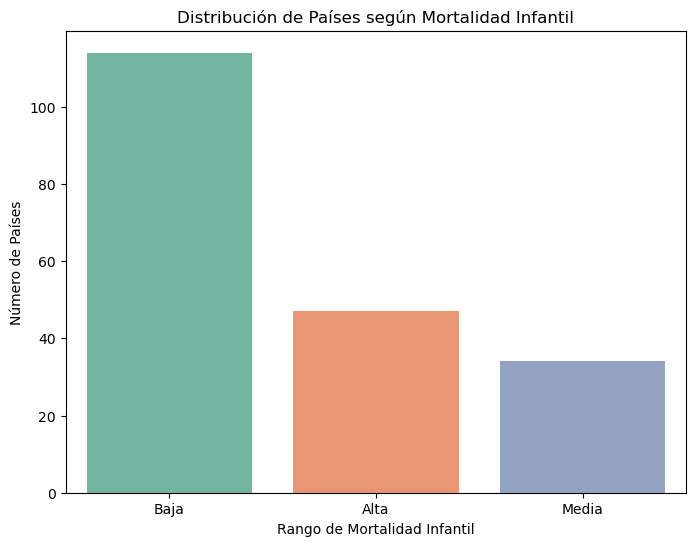

In [20]:
# Contar los países en cada rango de mortalidad
conteo_rangos = df_mort_infantil["analisis_mortalidad"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set2")

# Agregar títulos y etiquetas
plt.xlabel("Rango de Mortalidad Infantil")
plt.ylabel("Número de Países")
plt.title("Distribución de Países según Mortalidad Infantil")
plt.show()

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación



<Axes: xlabel='life_expectancy', ylabel='fertility_rate'>

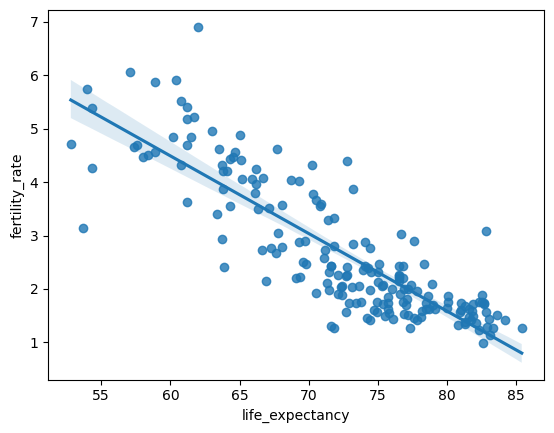

In [21]:
sns.regplot(y="fertility_rate", x="life_expectancy", data= df)

In [24]:
df_correlaciones =df[['life_expectancy','fertility_rate']].corr()
df_correlaciones

,life_expectancy,fertility_rate
life_expectancy,1.000000,-0.849153
fertility_rate,-0.849153,1.000000


In [25]:
df_correlaciones.iloc[0,1]

-0.8491528107360011

Este valor indica que la correlación está muy próxima al valor -1, existe correlación fuerte e inversa. A mayor esperanza de vida menor tasa de fertilidad. Y al contrario, los países con tasas de fertilidad altas, su esperanza de vida es menor que también se asocia a los PIB de los países.